<a href="https://colab.research.google.com/github/B4rb4r1s/ML-NN/blob/main/HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

In [3]:
import math
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn import datasets

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Logistic Regression

## SKLearn

In [4]:
# iris = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
iris = datasets.load_iris()

### Iris table

In [ ]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

### Code

In [5]:
X = iris.data[:, :2]    # we only take the first two features.
Y = iris.target

In [6]:
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

(627201,)


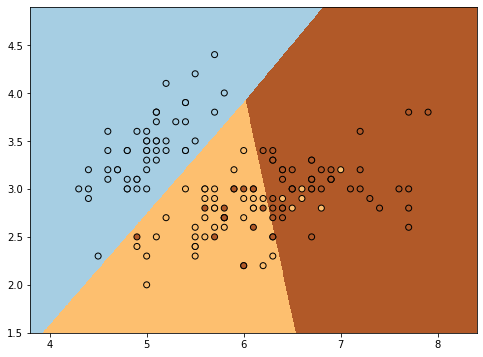

In [7]:
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
h = .005  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
print(Z.shape)
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')

# plt.xlim(xx.min(), xx.max())
# plt.ylim(yy.min(), yy.max())
# plt.xticks(())
# plt.yticks(())

plt.show()

## Manualy

In [8]:
# species = iris['species'].to_numpy().reshape(-1,1)

# sepal_length = iris['sepal_length'].to_numpy().reshape(-1,1)
# sepal_width = iris['sepal_width'].to_numpy().reshape(-1,1)
# petal_length = iris['petal_length'].to_numpy().reshape(-1,1)
# petal_width = iris['petal_width'].to_numpy().reshape(-1,1)

X = iris.data[:, 2:]
Y = iris.target

In [9]:
Y = Y.reshape((Y.shape[0], 1))
Y.shape

(150, 1)

In [10]:
class LogReg:
    def __init__(self, lr, gens):
        self.lr = lr
        self.gens = gens
        self.W = np.random.rand(2,1)
        self.b = 0.


    def w_corr(self, y_, y, X):
        # print(y.shape, y_.shape, X.shape)
        return 1 / y.shape[0] * np.sum((y_ - y) * X)
    def b_corr(self, y_, y):
        return 1 / y.shape[0] * np.sum(y_ - y)
    def MSE(self, y, y_):
        return -1 / y.shape[0] * np.sum(y * np.log(y_) + (1-y) * np.log(1-y_))


    def predict(self, X):
        return 1 / ( 1 + np.exp(-1 * self.z_pog( X )))

    def z_pog(self, X):
        # sum = 0.
        # for i in range(self.W.shape[0]):
        #     sum += self.W[i] * X[i]
        # # print("sum", sum.shape)
        # return sum + self.b
        return np.dot(X, self.W) + self.b

    def train(self, X, Y):
        for f in range(self.gens):
            y_ = self.predict( X )
            # print(y_.shape)

            self.W -= self.lr * self.w_corr(y_, Y, X)
            self.b -= self.lr * self.b_corr(y_, Y)
        print(self.MSE(Y, y_))
        

In [16]:
model = LogReg(1e-5, 15000)

In [17]:
model.train(X, Y)

-1.5356703658620345


(938400, 1) (680, 1380)


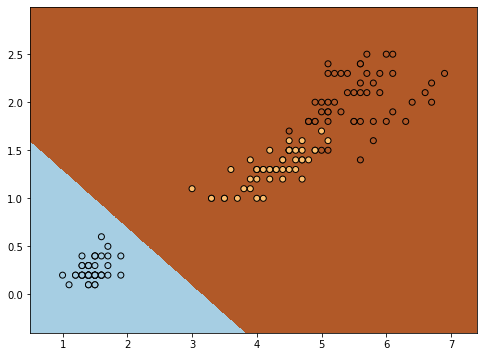

In [27]:
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
h = .005  # step size in the mesh

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
print(Z.shape, xx.shape)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))
plt.pcolormesh(xx, yy, np.round(Z+0.6), cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')

# plt.xlim(xx.min(), xx.max())
# plt.ylim(yy.min(), yy.max())
# plt.xticks(())
# plt.yticks(())

plt.show()

In [15]:
A = [[1, 2],
     [3, 4],
     [5, 6],
     [7, 8],
     [9, 10]]

np.dot(np.zeros((1,2)), [A[0][0], A[0][1]])
np.dot([A[0][0], A[0][1]], np.random.rand(2,1))

array([1.84037859])